In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
import os
import ast
from helpers import *

In [3]:
df_std = pd.read_csv("data_cleaned_standardized.csv", index_col=0)

In [4]:
df_std.columns = df_std.columns.str.replace(' ', '')
df_std.columns = df_std.columns.str.replace('-', '')
df_std.columns = df_std.columns.str.replace('&', '')


df_std= df_std[df_std['Movie_box_office_scaled'].notna()]
df_std= df_std[df_std['Movie_runtime'].notna()]
df_std= df_std[df_std['Actor_height_scaled'].notna()]
df_std.columns

Index(['Movie_release_date', 'Movie_box_office_scaled', 'Movie_runtime',
       'Actor_gender_male', 'Actor_height_scaled',
       'Actor_age_at_movie_release', 'Region_Asia', 'Region_Deadcountry',
       'Region_EastEuropa', 'Region_NorthAmerica', 'Region_Oceania',
       'Region_SouthAmerica', 'Region_WestEuropa', 'Cluster_Name_BWIndie',
       'Cluster_Name_ComedyAction', 'Cluster_Name_ComedyShortfilm',
       'Cluster_Name_CrimeThriller', 'Cluster_Name_Drama',
       'Cluster_Name_DramaBW', 'Cluster_Name_DramaComedy',
       'Cluster_Name_DramaIndie', 'Cluster_Name_DramaRomance',
       'Cluster_Name_DramaThriller', 'Cluster_Name_RomanceComedy',
       'Cluster_Name_ShortfilmWorldcinema', 'Cluster_Name_Thriller'],
      dtype='object')

In [5]:
df_std.reset_index(drop=True, inplace=True)
df_std

,Movie_release_date,Movie_box_office_scaled,Movie_runtime,Actor_gender_male,Actor_height_scaled,Actor_age_at_movie_release,Region_Asia,Region_Deadcountry,Region_EastEuropa,Region_NorthAmerica,...,Cluster_Name_CrimeThriller,Cluster_Name_Drama,Cluster_Name_DramaBW,Cluster_Name_DramaComedy,Cluster_Name_DramaIndie,Cluster_Name_DramaRomance,Cluster_Name_DramaThriller,Cluster_Name_RomanceComedy,Cluster_Name_ShortfilmWorldcinema,Cluster_Name_Thriller
0,0.662661,-0.422297,-0.144006,0,-0.195663,0.213048,-0.37943,-0.044978,-0.119255,0.674976,...,-0.281005,-0.209309,-0.173015,-0.306042,-0.227864,-0.250663,-0.450933,-0.251443,-0.359802,-0.188398
1,0.662661,-0.422297,-0.144006,0,1.829383,-0.825484,-0.37943,-0.044978,-0.119255,0.674976,...,-0.281005,-0.209309,-0.173015,-0.306042,-0.227864,-0.250663,-0.450933,-0.251443,-0.359802,-0.188398
2,0.662661,-0.422297,-0.144006,1,-1.009765,-0.479307,-0.37943,-0.044978,-0.119255,0.674976,...,-0.281005,-0.209309,-0.173015,-0.306042,-0.227864,-0.250663,-0.450933,-0.251443,-0.359802,-0.188398
3,0.662661,-0.422297,-0.144006,1,-0.747543,-0.410071,-0.37943,-0.044978,-0.119255,0.674976,...,-0.281005,-0.209309,-0.173015,-0.306042,-0.227864,-0.250663,-0.450933,-0.251443,-0.359802,-0.188398
4,0.662661,-0.422297,-0.144006,0,0.184033,-1.102427,-0.37943,-0.044978,-0.119255,0.674976,...,-0.281005,-0.209309,-0.173015,-0.306042,-0.227864,-0.250663,-0.450933,-0.251443,-0.359802,-0.188398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46364,0.364984,-0.367264,0.130824,1,-0.177494,0.282284,-0.37943,-0.044978,-0.119255,0.674976,...,-0.281005,-0.209309,-0.173015,-0.306042,-0.227864,-0.250663,-0.450933,-0.251443,-0.359802,5.307911
46365,0.364984,-0.367264,0.130824,0,0.361225,-0.410071,-0.37943,-0.044978,-0.119255,0.674976,...,-0.281005,-0.209309,-0.173015,-0.306042,-0.227864,-0.250663,-0.450933,-0.251443,-0.359802,5.307911
46366,0.364984,-0.367264,0.130824,1,-0.291504,0.074577,-0.37943,-0.044978,-0.119255,0.674976,...,-0.281005,-0.209309,-0.173015,-0.306042,-0.227864,-0.250663,-0.450933,-0.251443,-0.359802,5.307911
46367,0.364984,-0.367264,0.130824,1,-1.203582,-0.202365,-0.37943,-0.044978,-0.119255,0.674976,...,-0.281005,-0.209309,-0.173015,-0.306042,-0.227864,-0.250663,-0.450933,-0.251443,-0.359802,5.307911


In [6]:
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

mod = smf.logit(formula='Actor_gender_male ~  Movie_release_date + Movie_box_office_scaled +Movie_runtime+Actor_height_scaled \
                +Actor_age_at_movie_release+ C(Region_Asia)+ C(Region_Deadcountry)+C(Region_EastEuropa)+C(Region_NorthAmerica)+C(Region_Oceania)\
                +C(Region_SouthAmerica)+C(Region_WestEuropa)+C(Region_Asia)+C(Region_Deadcountry)\
                +C(Region_EastEuropa)+C(Region_NorthAmerica)+C(Region_Oceania)+ C(Cluster_Name_CrimeThriller)+ C(Cluster_Name_Drama)\
                +C(Region_SouthAmerica)+ C(Region_WestEuropa)+ C(Cluster_Name_BWIndie)+C(Cluster_Name_ComedyAction)+ C(Cluster_Name_ComedyShortfilm)+\
                +C(Cluster_Name_DramaBW)+C(Cluster_Name_DramaComedy)+C(Cluster_Name_DramaIndie)+ C(Cluster_Name_DramaRomance)+C(Cluster_Name_DramaThriller)+C(Cluster_Name_RomanceComedy)\
                +C(Cluster_Name_ShortfilmWorldcinema)+C(Cluster_Name_Thriller)', data=df_std)
res = mod.fit()
df_std['Propensity_score'] = res.predict()
print(res.summary())
df_std.head()

Optimization terminated successfully.
         Current function value: 0.564514
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:      Actor_gender_male   No. Observations:                46369
Model:                          Logit   Df Residuals:                    46343
Method:                           MLE   Df Model:                           25
Date:                Sun, 15 Dec 2024   Pseudo R-squ.:                  0.1226
Time:                        18:44:56   Log-Likelihood:                -26176.
converged:                       True   LL-Null:                       -29833.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                                coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Intercept     

,Movie_release_date,Movie_box_office_scaled,Movie_runtime,Actor_gender_male,Actor_height_scaled,Actor_age_at_movie_release,Region_Asia,Region_Deadcountry,Region_EastEuropa,Region_NorthAmerica,...,Cluster_Name_Drama,Cluster_Name_DramaBW,Cluster_Name_DramaComedy,Cluster_Name_DramaIndie,Cluster_Name_DramaRomance,Cluster_Name_DramaThriller,Cluster_Name_RomanceComedy,Cluster_Name_ShortfilmWorldcinema,Cluster_Name_Thriller,Propensity_score
0,0.662661,-0.422297,-0.144006,0,-0.195663,0.213048,-0.37943,-0.044978,-0.119255,0.674976,...,-0.209309,-0.173015,-0.306042,-0.227864,-0.250663,-0.450933,-0.251443,-0.359802,-0.188398,0.820378
1,0.662661,-0.422297,-0.144006,0,1.829383,-0.825484,-0.37943,-0.044978,-0.119255,0.674976,...,-0.209309,-0.173015,-0.306042,-0.227864,-0.250663,-0.450933,-0.251443,-0.359802,-0.188398,0.358258
2,0.662661,-0.422297,-0.144006,1,-1.009765,-0.479307,-0.37943,-0.044978,-0.119255,0.674976,...,-0.209309,-0.173015,-0.306042,-0.227864,-0.250663,-0.450933,-0.251443,-0.359802,-0.188398,0.836962
3,0.662661,-0.422297,-0.144006,1,-0.747543,-0.410071,-0.37943,-0.044978,-0.119255,0.674976,...,-0.209309,-0.173015,-0.306042,-0.227864,-0.250663,-0.450933,-0.251443,-0.359802,-0.188398,0.817167
4,0.662661,-0.422297,-0.144006,0,0.184033,-1.102427,-0.37943,-0.044978,-0.119255,0.674976,...,-0.209309,-0.173015,-0.306042,-0.227864,-0.250663,-0.450933,-0.251443,-0.359802,-0.188398,0.596181


In [ ]:
# feature names
variables = res.params.index

# quantifying uncertainty!

# coefficients
coefficients = res.params.values

# p-values
p_values = res.pvalues

# standard errors
standard_errors = res.bse.values

#confidence intervals
res.conf_int()
l1, l2, l3, l4 = zip(*sorted(zip(coefficients[1:], variables[1:], standard_errors[1:], p_values[1:])))
plt.errorbar(l1, np.array(range(len(l1))), xerr= 2*np.array(l3), linewidth = 1,
             linestyle = 'none',marker = 'o',markersize= 3,
             markerfacecolor = 'black',markeredgecolor = 'black', capsize= 5)

plt.vlines(0,0, len(l1), linestyle = '--')

plt.yticks(range(len(l2)),l2);

In [90]:
import networkx as nx
dftest = df_std.sample(n=250)
dftest.head()
control = dftest[dftest.Actor_gender_male == 0]
treat =  dftest[dftest.Actor_gender_male == 1 ]
def computediff(prop1,prop2):
    return np.abs(prop1-prop2)
def compute_similarity(prop1,prop2):
    return 1-np.abs(prop1-prop2)

G = nx.Graph()
for treat_id,treat_row in treat.iterrows():
    for control_id, control_row in control.iterrows():
        diff= computediff(control_row["Propensity_score"],treat_row["Propensity_score"])
        if (diff<0.05):
            similarity =  compute_similarity(control_row["Propensity_score"],treat_row["Propensity_score"])
            G.add_weighted_edges_from([(control_id, treat_id, similarity)])
matching = nx.max_weight_matching(G)
#matched = [i[0] for i in list(matching)] + [i[1] for i in list(matching)]
print("Number of successful matching:",len(matching))
print(matching)

Number of successful matching: 81
{(31908, 2719), (42348, 29641), (1011, 6527), (29043, 37232), (28095, 28524), (32591, 6964), (20856, 31803), (43484, 28706), (45286, 17702), (33157, 32059), (23371, 39580), (1878, 32766), (31517, 39305), (27703, 1803), (40320, 43009), (1733, 7147), (35473, 11308), (32029, 35208), (29240, 14035), (23542, 14931), (14437, 775), (32768, 40562), (5592, 30743), (5275, 16440), (4512, 14624), (30119, 31258), (35841, 4698), (29983, 14737), (42807, 42531), (4370, 28613), (32117, 2141), (89, 4298), (2178, 16031), (2219, 22393), (28439, 25718), (25787, 30416), (31750, 12128), (13346, 39125), (39906, 43000), (46181, 35562), (32106, 29396), (24251, 19105), (43610, 26516), (11301, 22061), (19518, 10607), (22650, 10448), (19613, 26855), (14485, 12259), (31356, 27832), (5604, 2661), (44400, 21417), (15929, 29568), (20004, 13510), (16829, 2739), (42325, 43262), (45941, 13370), (27655, 36838), (22808, 25264), (36900, 18894), (37867, 18554), (33258, 3544), (34263, 18985),

In [92]:
matched = [i[0] for i in list(matching)] + [i[1] for i in list(matching)]
bd = df_std.iloc[matched]

treated = bd.loc[bd['Actor_gender_male'] == 1]
control= bd.loc[bd['Actor_gender_male'] == 0]


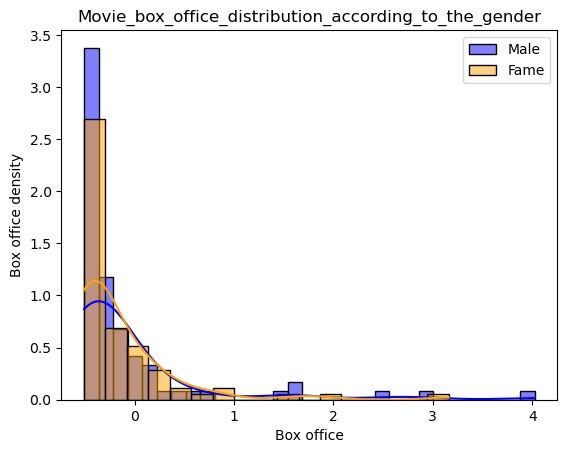

In [94]:
ax = sns.histplot(treated['Movie_box_office_scaled'], kde=True, stat='density', color='blue', label='Male');
ax = sns.histplot(control['Movie_box_office_scaled'], kde=True, stat='density', color='orange', label='Fame')
ax.set(title='Movie_box_office_distribution_according_to_the_gender',xlabel='Box office', ylabel='Box office density')
plt.legend()
plt.show()


In [96]:
from scipy.stats import ttest_ind
ttest_ind(treated['Movie_box_office_scaled'],control['Movie_box_office_scaled'])

TtestResult(statistic=0.63473315900827, pvalue=0.5265090430831347, df=160.0)